<a href="https://colab.research.google.com/github/arizonaCameraLab/computationalImaging/blob/master/Chapter2ForwardModels/SpectralAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spectral Analysis
### David J. Brady
### University of Arizona
## Computational Optical Imaging

This notebook supports ideas developed in section 2.7 of *Computational Optical Imaging*. Specifically we consider spectral analysis of discrete forward models.

#### initialization code

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, InterpolatedUnivariateSpline
from scipy import integrate
from scipy.linalg import toeplitz
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
#plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})
from google.colab import files
#!apt install texlive-fonts-recommended texlive-fonts-extra



## Sampling matrices

A discrete sampling sytem may be modeled as ${\bf g}={\bf Hf}$ where
$$ h_{mn}=\int p_m(x)\phi_n(x)dx$$
where $p_m(x)$ is the sampling function and $\phi_n(x)$ is the basis of ${\bf f}$. For rectangular sampling with $f(x)$ represented on the Shannon basis, for example,
$$p_m(x)={\rm rect}\left (\frac{x}{\Delta_p} -mr_p\right )$$
and
$$\phi_n(x)={\rm sinc} \left (\frac{x}{\Delta_f} - n\right )$$
where $r_p$ is the ratio between the sampling pitch and the width of the sampling function.

One can find $h_{mn}$ for this case by evaluating terms in the series
$$ h_{m}=\int {\rm rect}\left (\frac{x}{\Delta_p} -m\right ){\rm sinc} \left (\frac{x}{\Delta_f}\right )dx$$

Nyquist sampling corresponds to selecting $r_p\Delta_p=\Delta_f$.

Here we evaluate $h_{mn}$ using numerical integration for $\Delta_p=[0.5,1,2]\times\Delta_f$

In [72]:
def hmnSinc(deltaP,mMax):
  h=np.zeros(2*mMax+1)
  for m in range(-mMax,(mMax+1)):
    h[m+mMax] = integrate.quad(np.sinc, (m-0.5)*deltaP, (m+.5)*deltaP)[0]
  return h

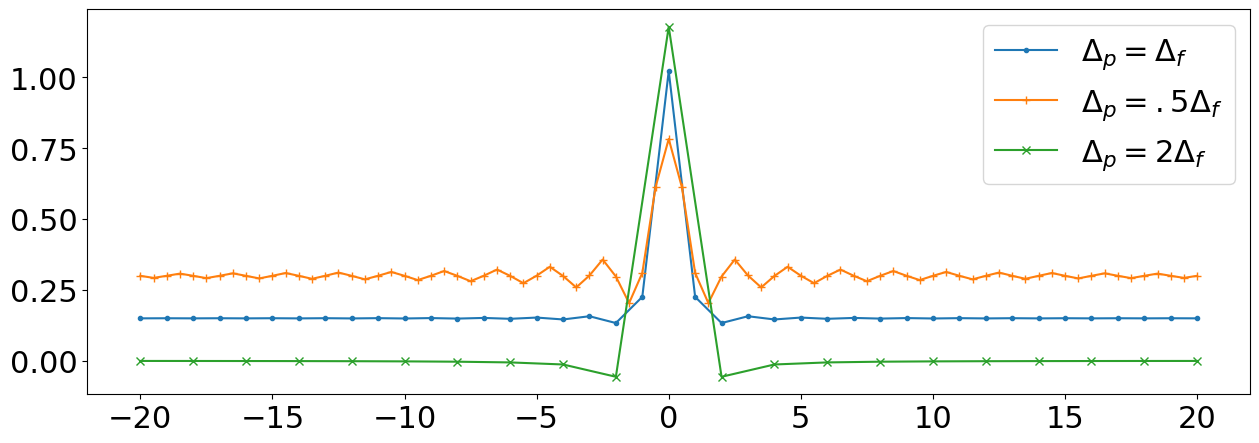

In [88]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(-20,21),hmnSinc(1,20)+.15,marker='.')
plt.plot(np.arange(-20,20.5,.5),hmnSinc(.5,40)+.3, marker='+')
plt.plot(np.arange(-20,21,2),hmnSinc(2,10), marker='x')
plt.legend([r'$\Delta_p=\Delta_f$',r'$\Delta_p=.5\Delta_f$',r'$\Delta_p=2\Delta_f$'])
plt.savefig('sincRectSamples.png')



The structure of forward models can be analyzed using spectral analysis. An $m\times n$ matrix $\mathbf{H}$ can be decomposed using singular value analysis into the for
$$
\mathbf{H}={\mathbf U\Lambda V'}
$$
where $\mathbf{U}$ is an $m\times m$ unitary matrix, $\mathbf{V}$ is an $n\times n$ unitary matrix and $\Lambda $ is a diagonal matrix. Here we look at the singular values and singular vectors for various example matrices. We start by considering the singular values for rectangular sampling using the sampling duty cyles listed above.

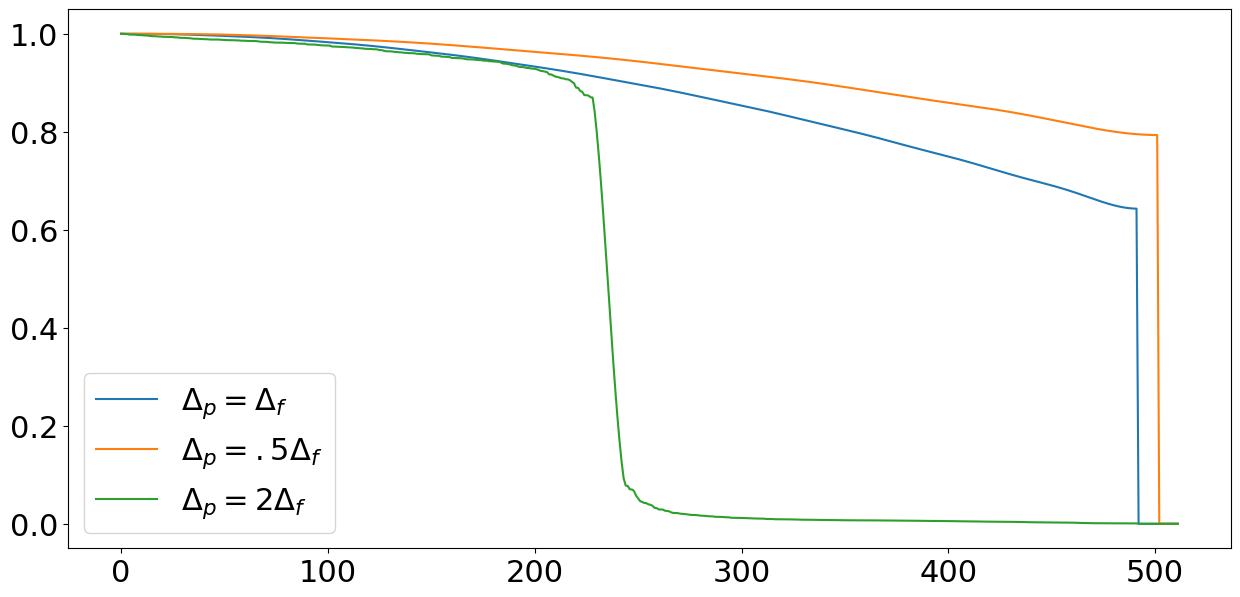

In [89]:
plt.figure(figsize=(15,7))
psf=hmnSinc(1,20)
N=512
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=firstRow[0]
H=toeplitz(firstColumn,firstRow)
u1, s1, vh1=np.linalg.svd(H)
psf=hmnSinc(2,10)
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=firstRow[0]
H=toeplitz(firstColumn,firstRow)
u, s2, vh=np.linalg.svd(H)
psf=hmnSinc(.5,40)
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=firstRow[0]
H=toeplitz(firstColumn,firstRow)
u, s3, vh=np.linalg.svd(H)
plt.plot(s1/s1[0])
plt.plot(s2/s2[0])
plt.plot(s3/s3[0])
plt.legend([r'$\Delta_p=\Delta_f$',r'$\Delta_p=.5\Delta_f$',r'$\Delta_p=2\Delta_f$'])
plt.savefig('rectSincSpectrum.png')
#files.download('spectrum.png')


Here we plot the first 256 object signular vectors with the top plot corresponding to $\Delta_p=\Delta_f$ and the bottom corresponding to $\Delta_p=2\Delta_f$

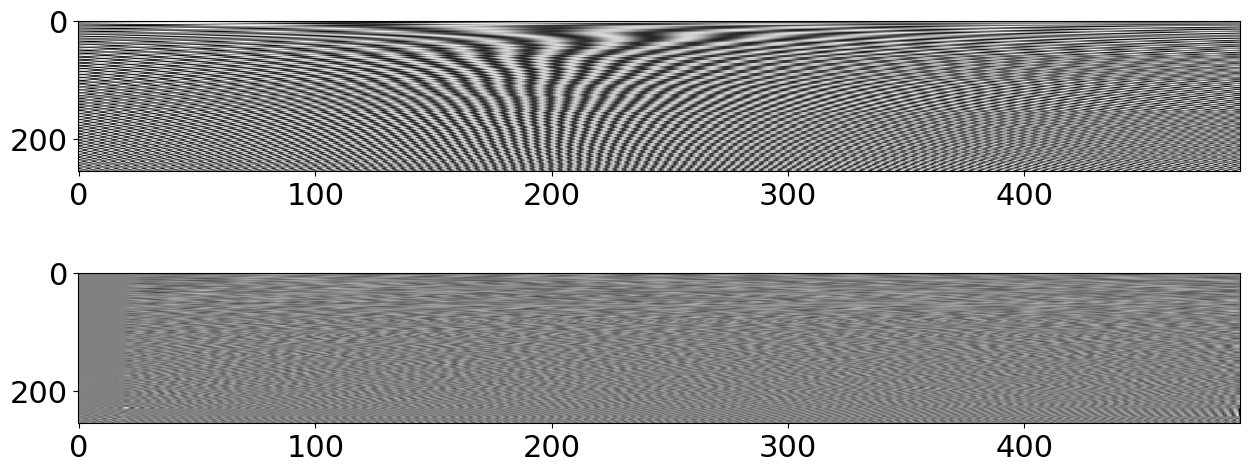

In [90]:
plt.figure(figsize=(15,6))
plt.subplot(2,1,1 )
plt.imshow(vh1[1:256,20:],aspect=0.25,cmap='gray')
plt.subplot(2,1,2 )
plt.imshow(vh[1:256,20:],aspect=0.25,cmap='gray')
plt.savefig('rectSincVectors.png')
#files.download('rectSincVectors.png')


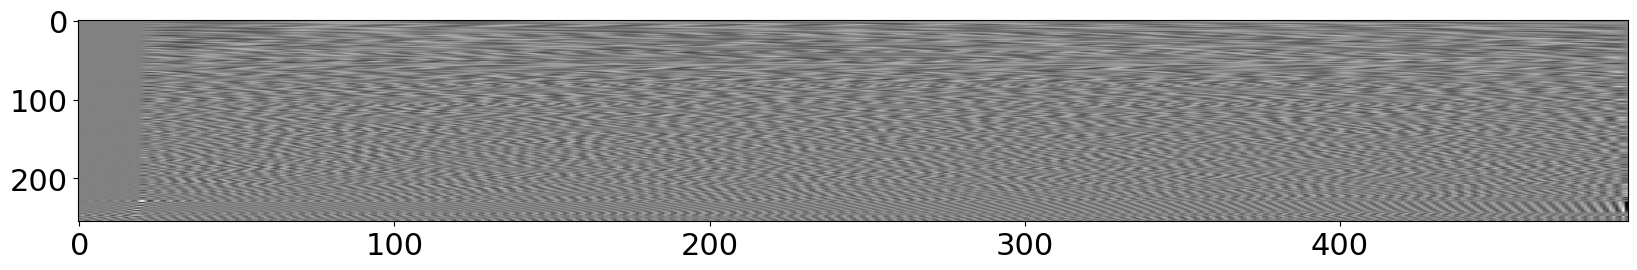

In [68]:
plt.imshow(vh[1:256,20:],aspect=0.25,cmap='gray')

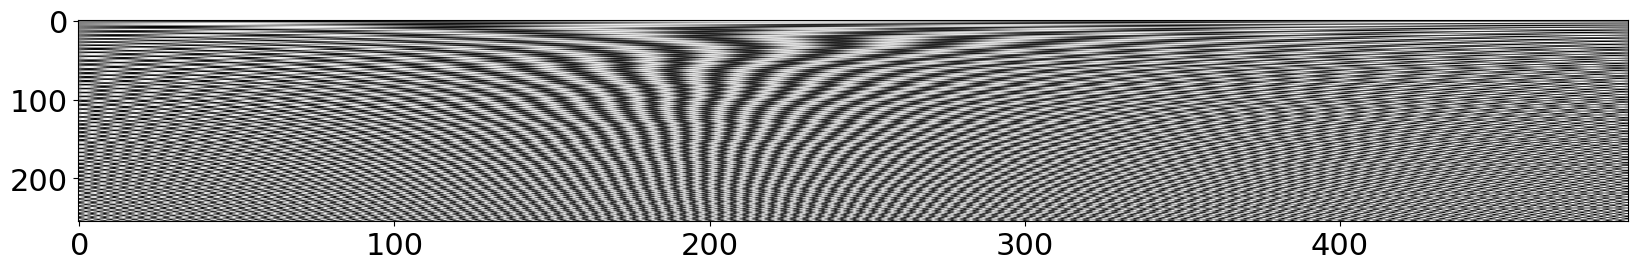

In [69]:
plt.imshow(vh1[1:256,20:],aspect=0.25,cmap='gray')

In [96]:
np.sinc(.25)

0.9003163161571061

## circulant matrices

shift invariant linear transformations are common in imaging systems. These transformations can be modeled in discrete form using circulant or Toeplitz matrices. Consider for example a 1 dimensional system with discrete impulse response integrating [1 1 1 1 1 1 1 1] on a sampling range of 512 input pixels. This forward model takes the form shown below

### 1 1 1 1 1 1 1 1 1

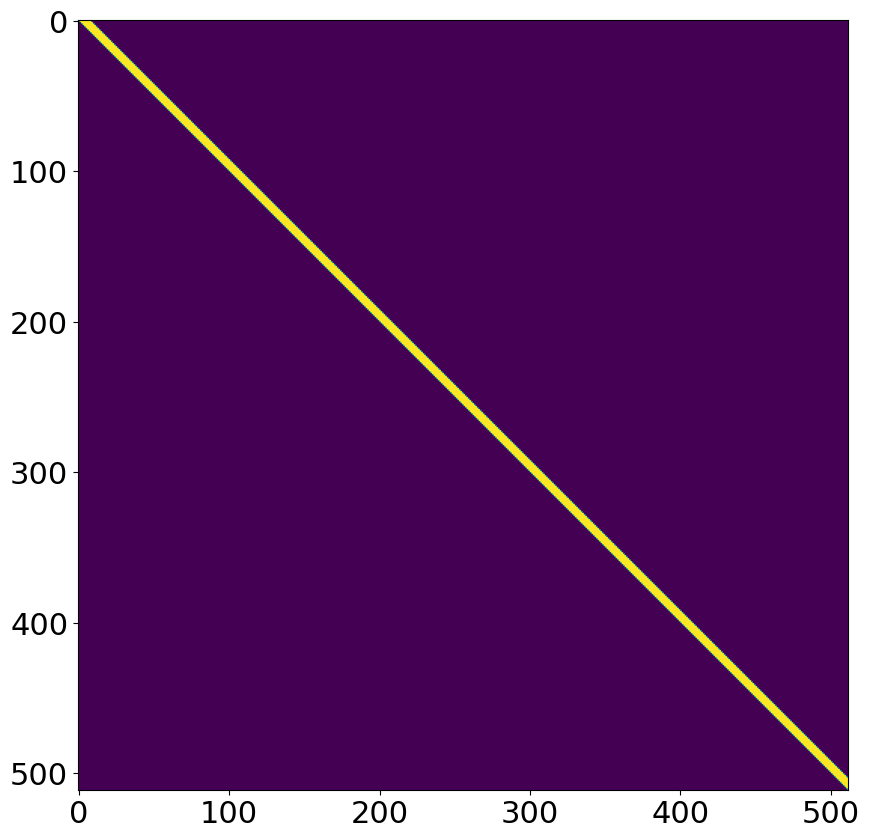

In [ ]:
#
from scipy.linalg import toeplitz
psf=[1,1,1,1,1,1,1,1]
N=512
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=1
H=toeplitz(firstColumn,firstRow)
u, s, vh=np.linalg.svd(H)
plt.imshow(H)




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

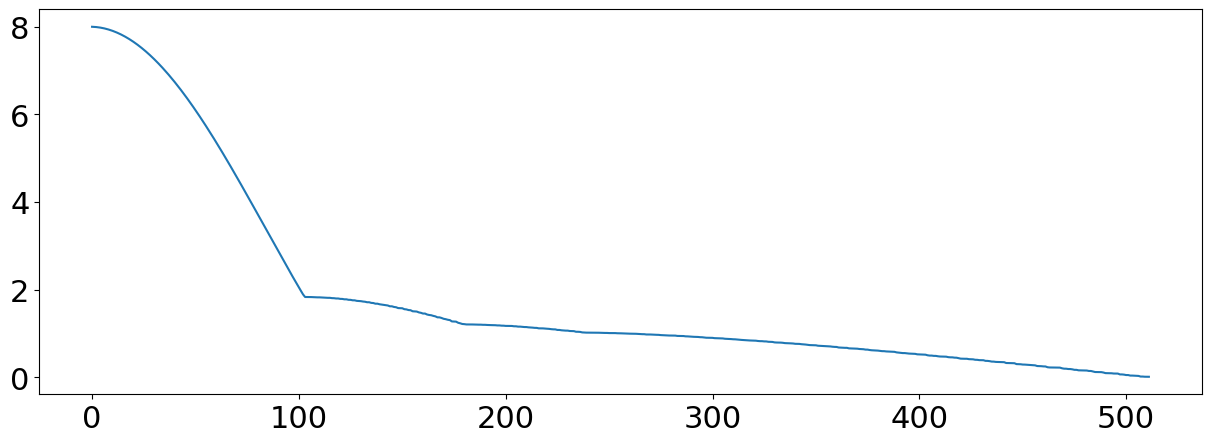

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(s)
plt.savefig('rectSpectrum.png')
files.download('rectSpectrum.png')


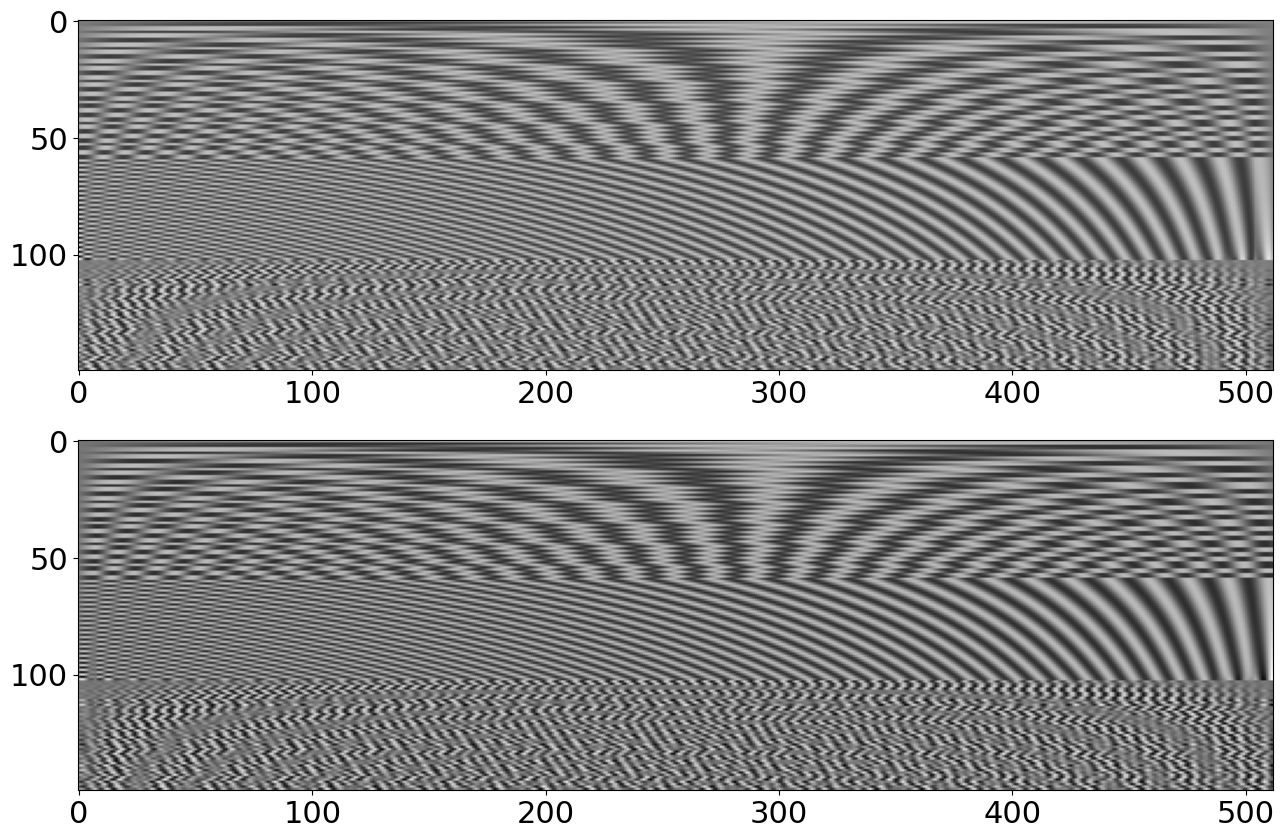

In [ ]:
plt.subplot(2,1,1)
plt.imshow(np.transpose(u)[0:150],cmap='gray')
plt.subplot(2,1,2)
plt.imshow(vh[0:150,:],cmap='gray')
plt.savefig('rectVectors.png')
#files.download('rectVectors.png')


now let's consider down sampling rather than convolving with the down sample operator. We measure input signals in groups of 8 as a sum.

### 1 0 1 1 0 1 1 0 1

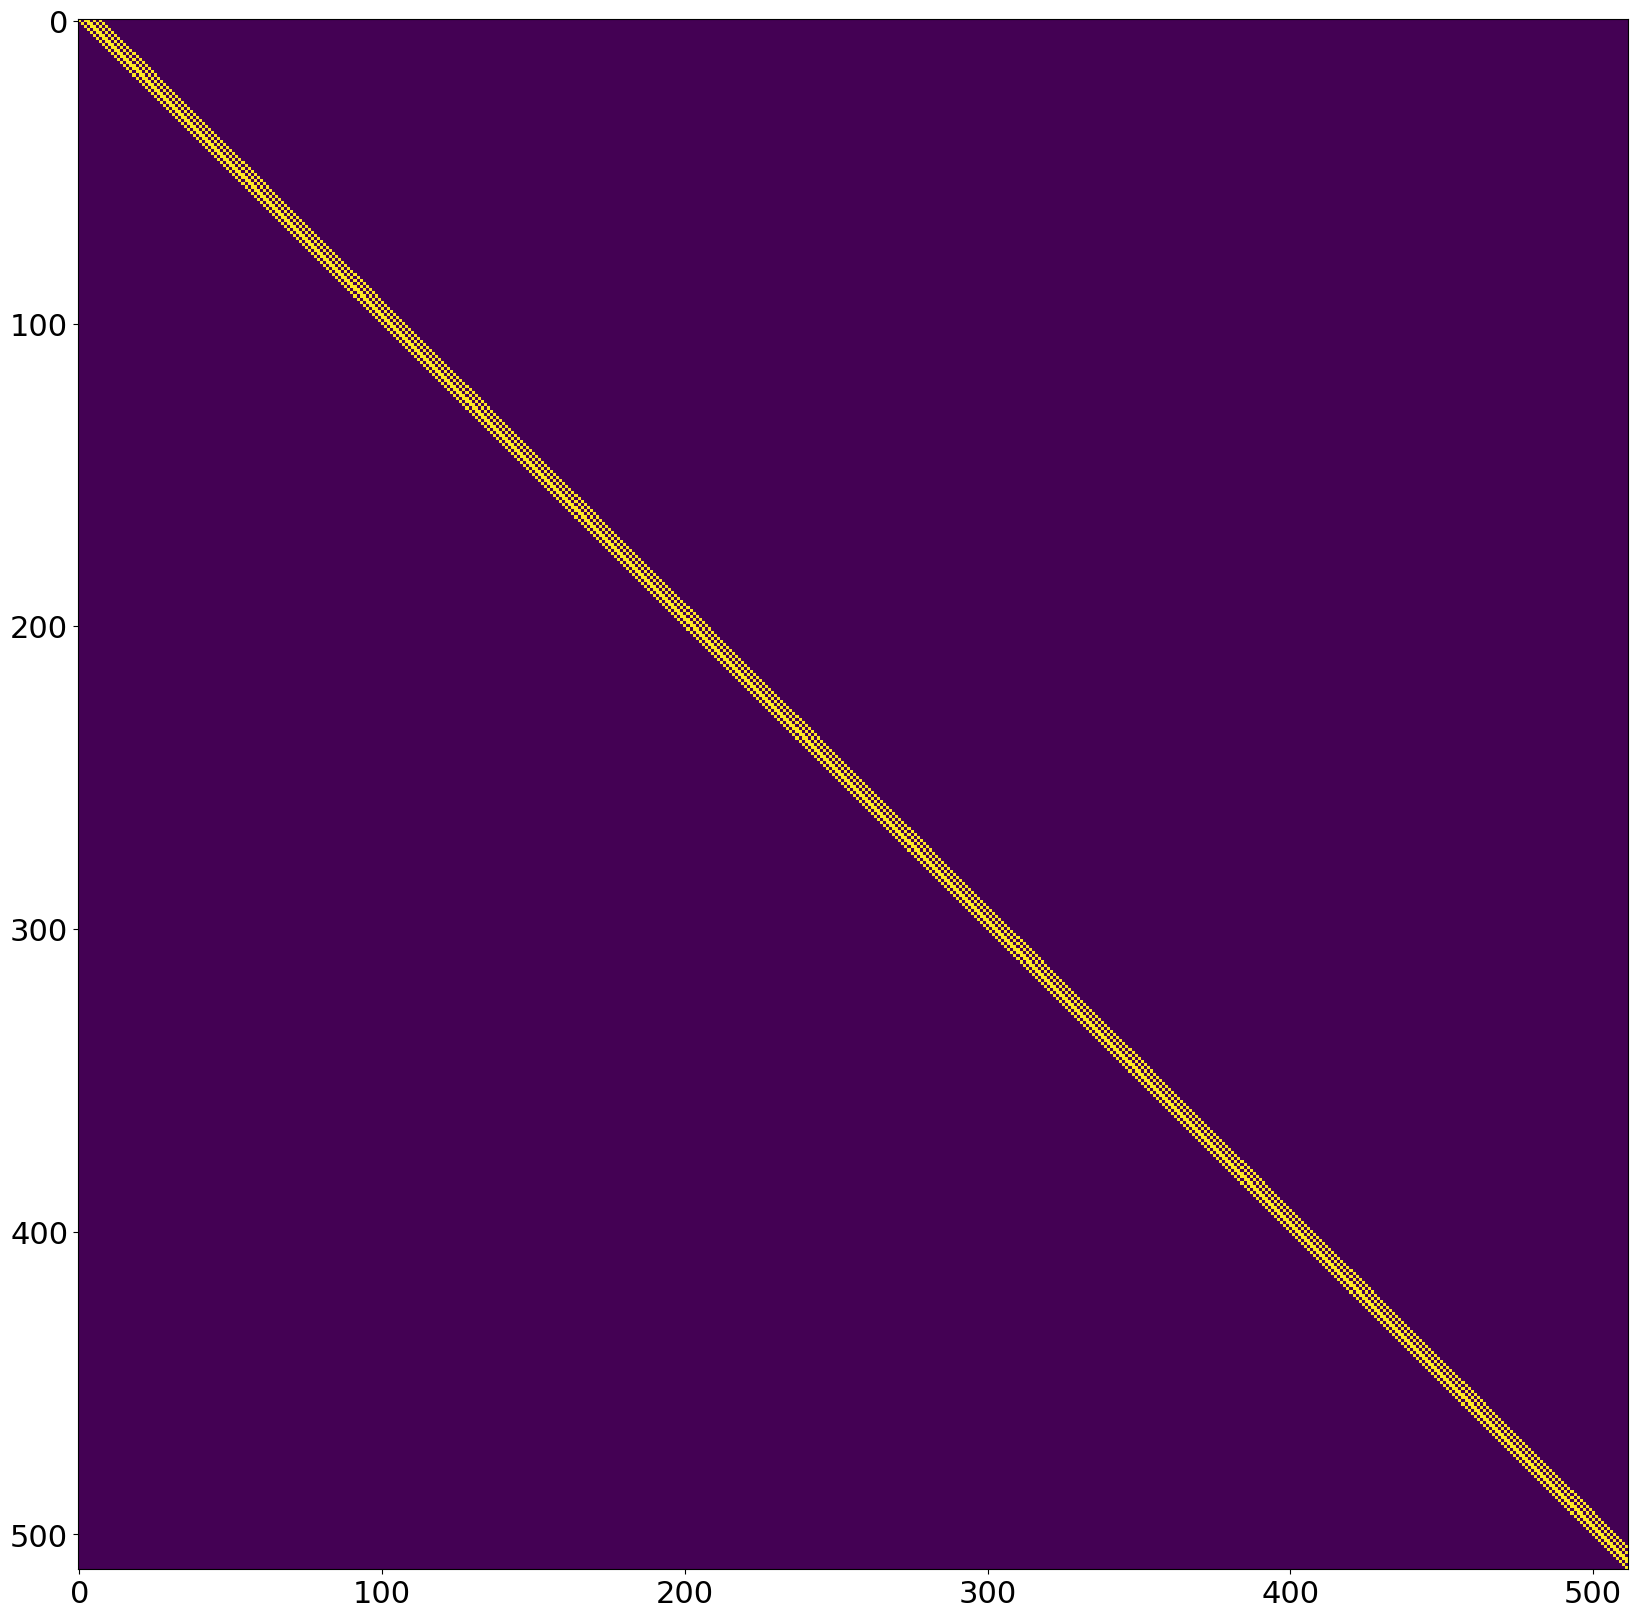

In [ ]:
#
from scipy.linalg import toeplitz
psf=[1,0,1,1,0,1,0,1]
N=512
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=1
H=toeplitz(firstColumn,firstRow)
u, s, vh=np.linalg.svd(H)
plt.imshow(H)




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

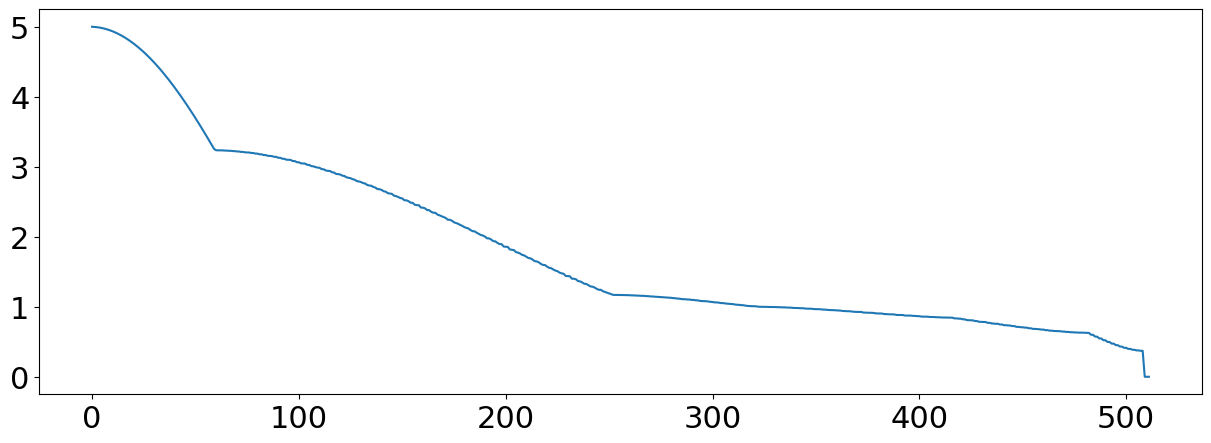

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(s)
plt.savefig('modSpectrum.png')
files.download('modSpectrum.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

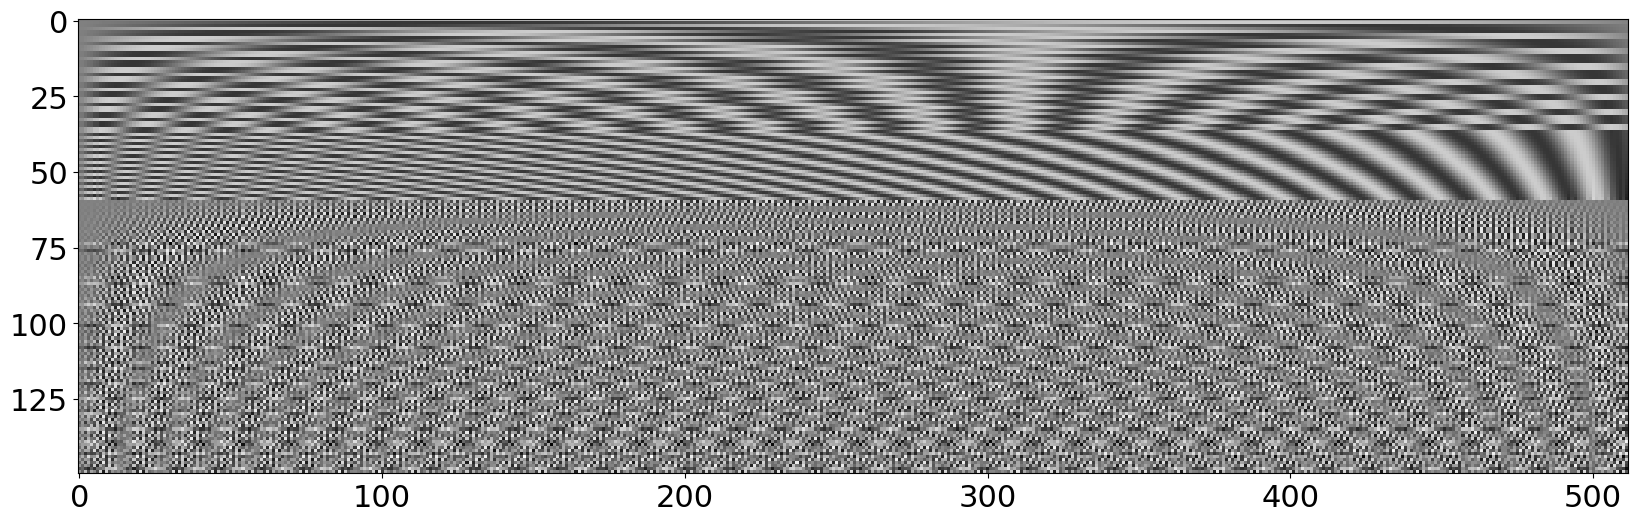

In [ ]:
plt.imshow(vh[0:150,:],cmap='gray')
plt.savefig('modVectors.png')
files.download('modVectors.png')


### 1 -1 1 1 -1 1 1 -1 1

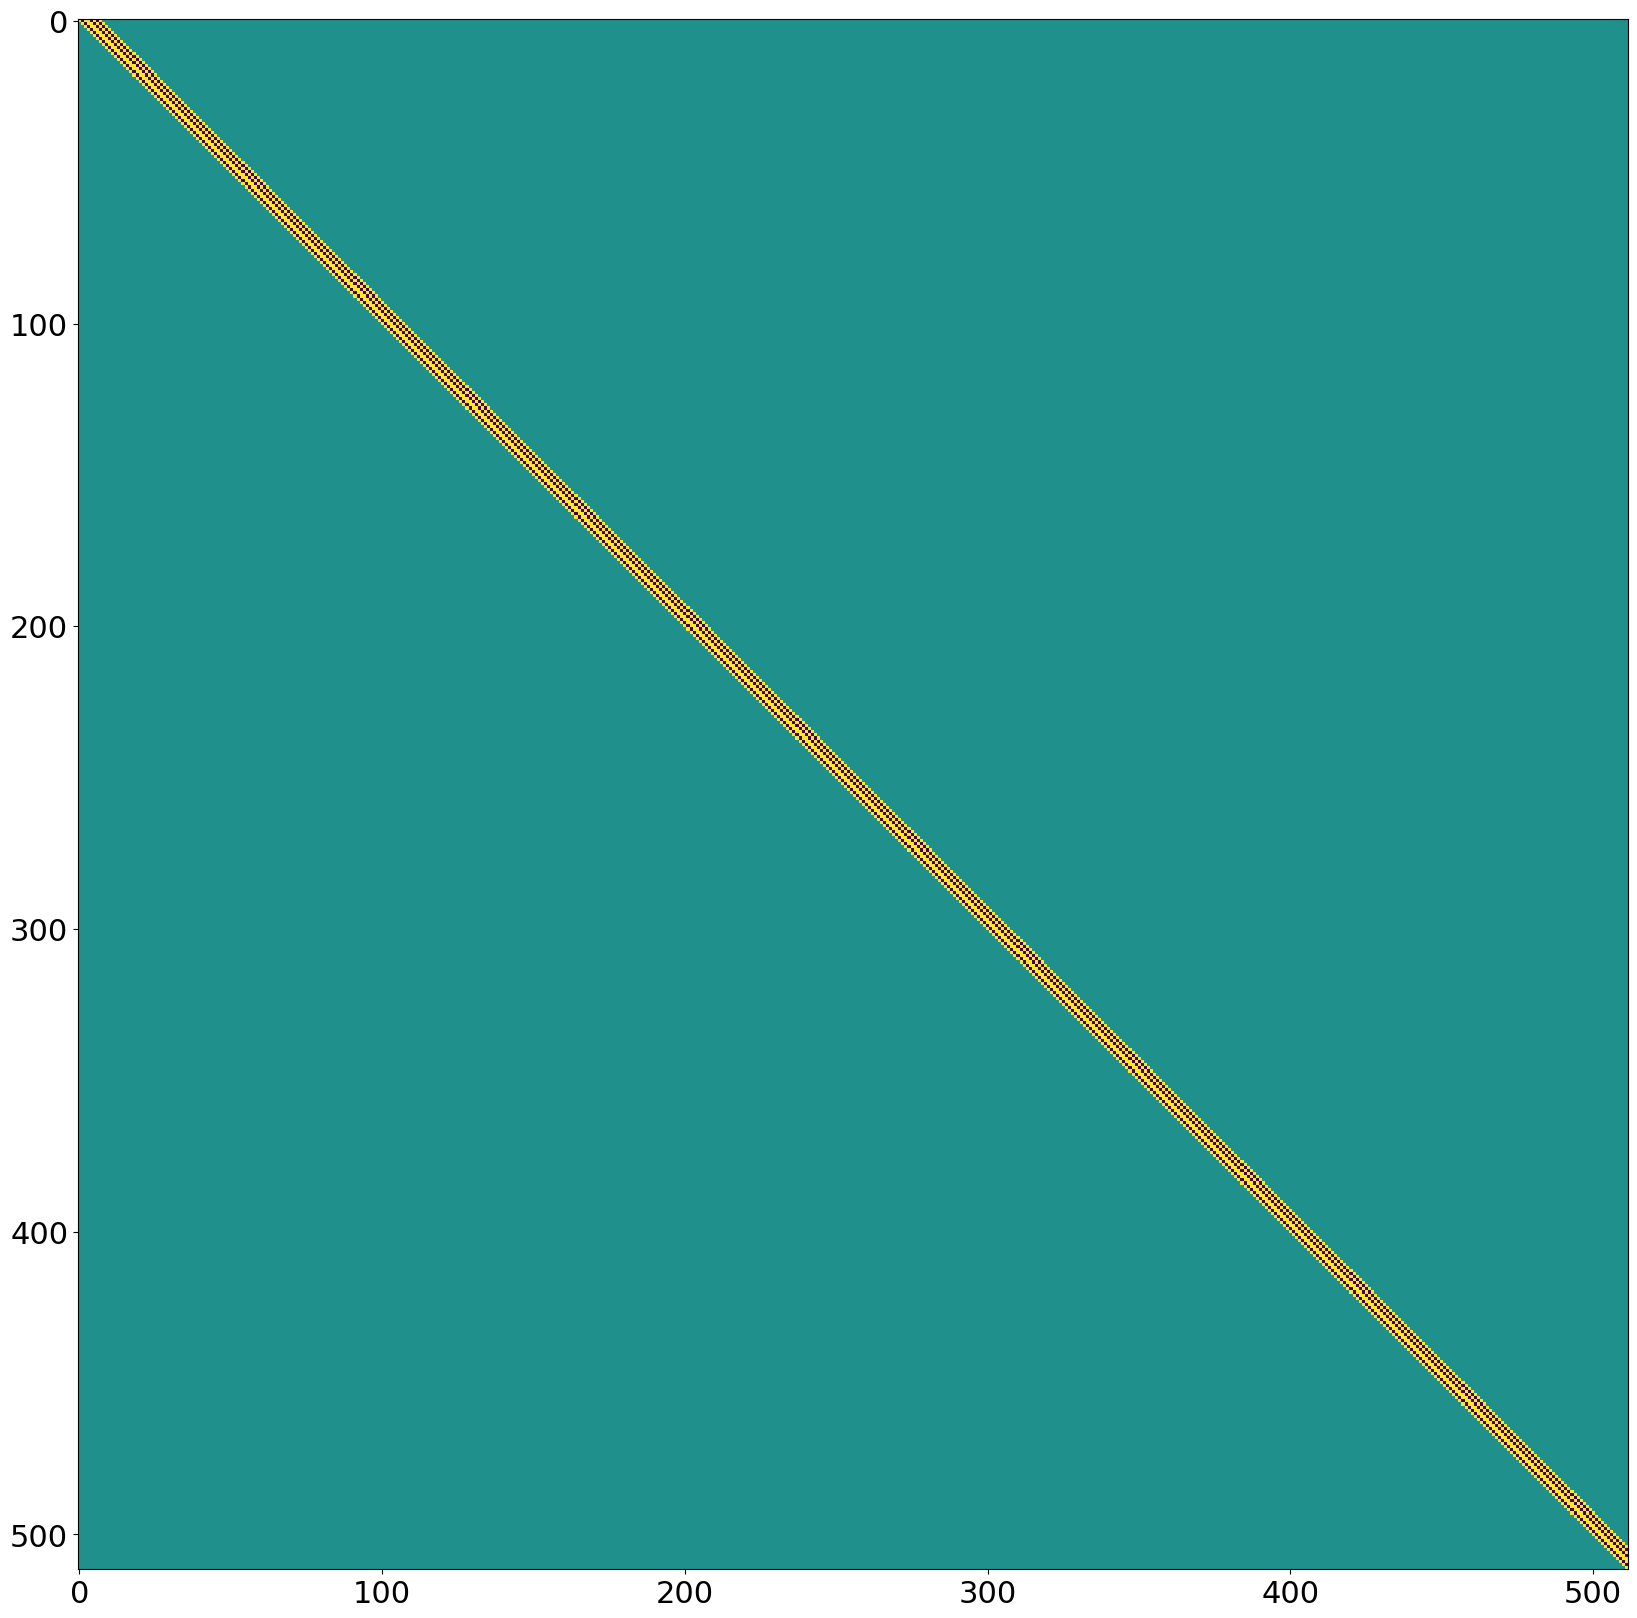

In [ ]:
#
from scipy.linalg import toeplitz
psf=[1,-1,1,1,-1,1,-1,1]
N=512
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=1
H=toeplitz(firstColumn,firstRow)
u, s, vh=np.linalg.svd(H)
plt.imshow(H)




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

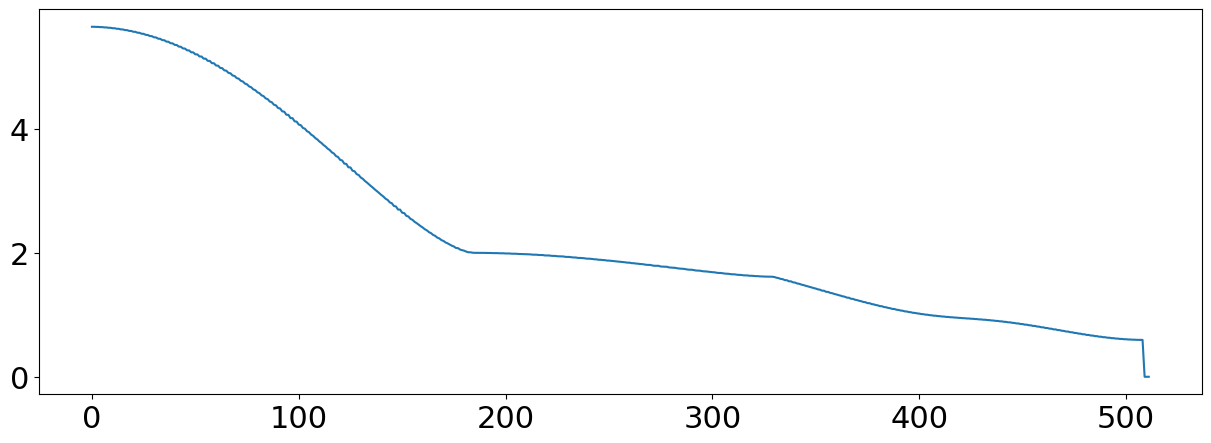

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(s)
plt.savefig('bipolarSpectrum.png')
files.download('bipolarSpectrum.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

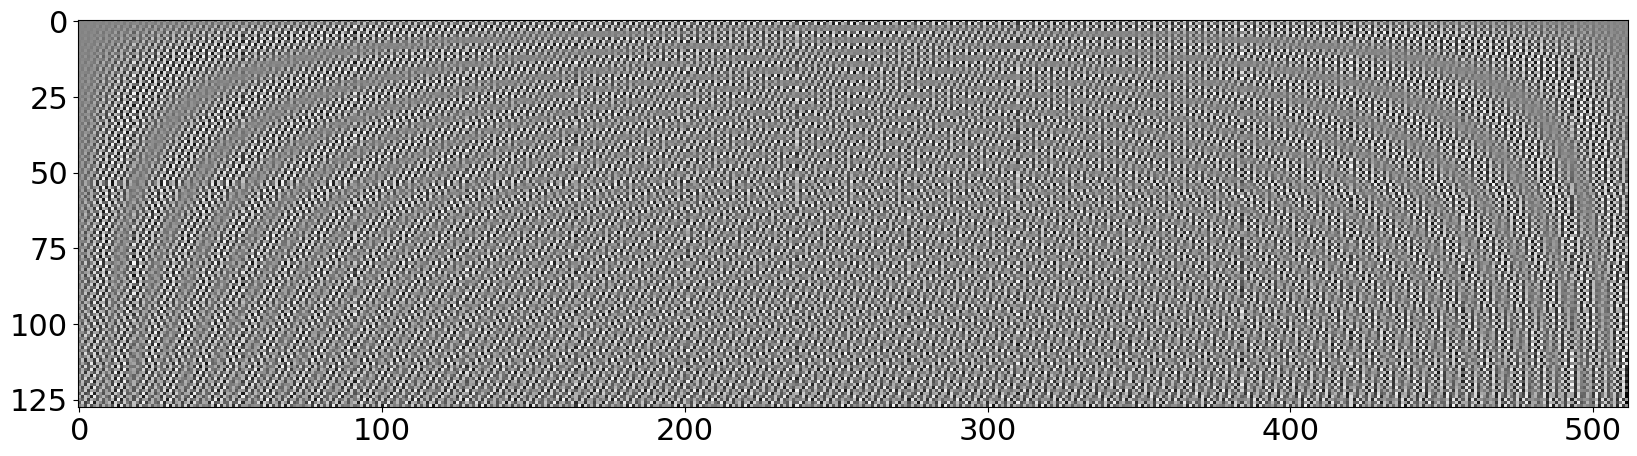

In [ ]:
plt.imshow(vh[0:128,:],cmap='gray')
plt.savefig('bipolarVectors.png')
files.download('bipolarVectors.png')

### sinc

### sinc$^2$

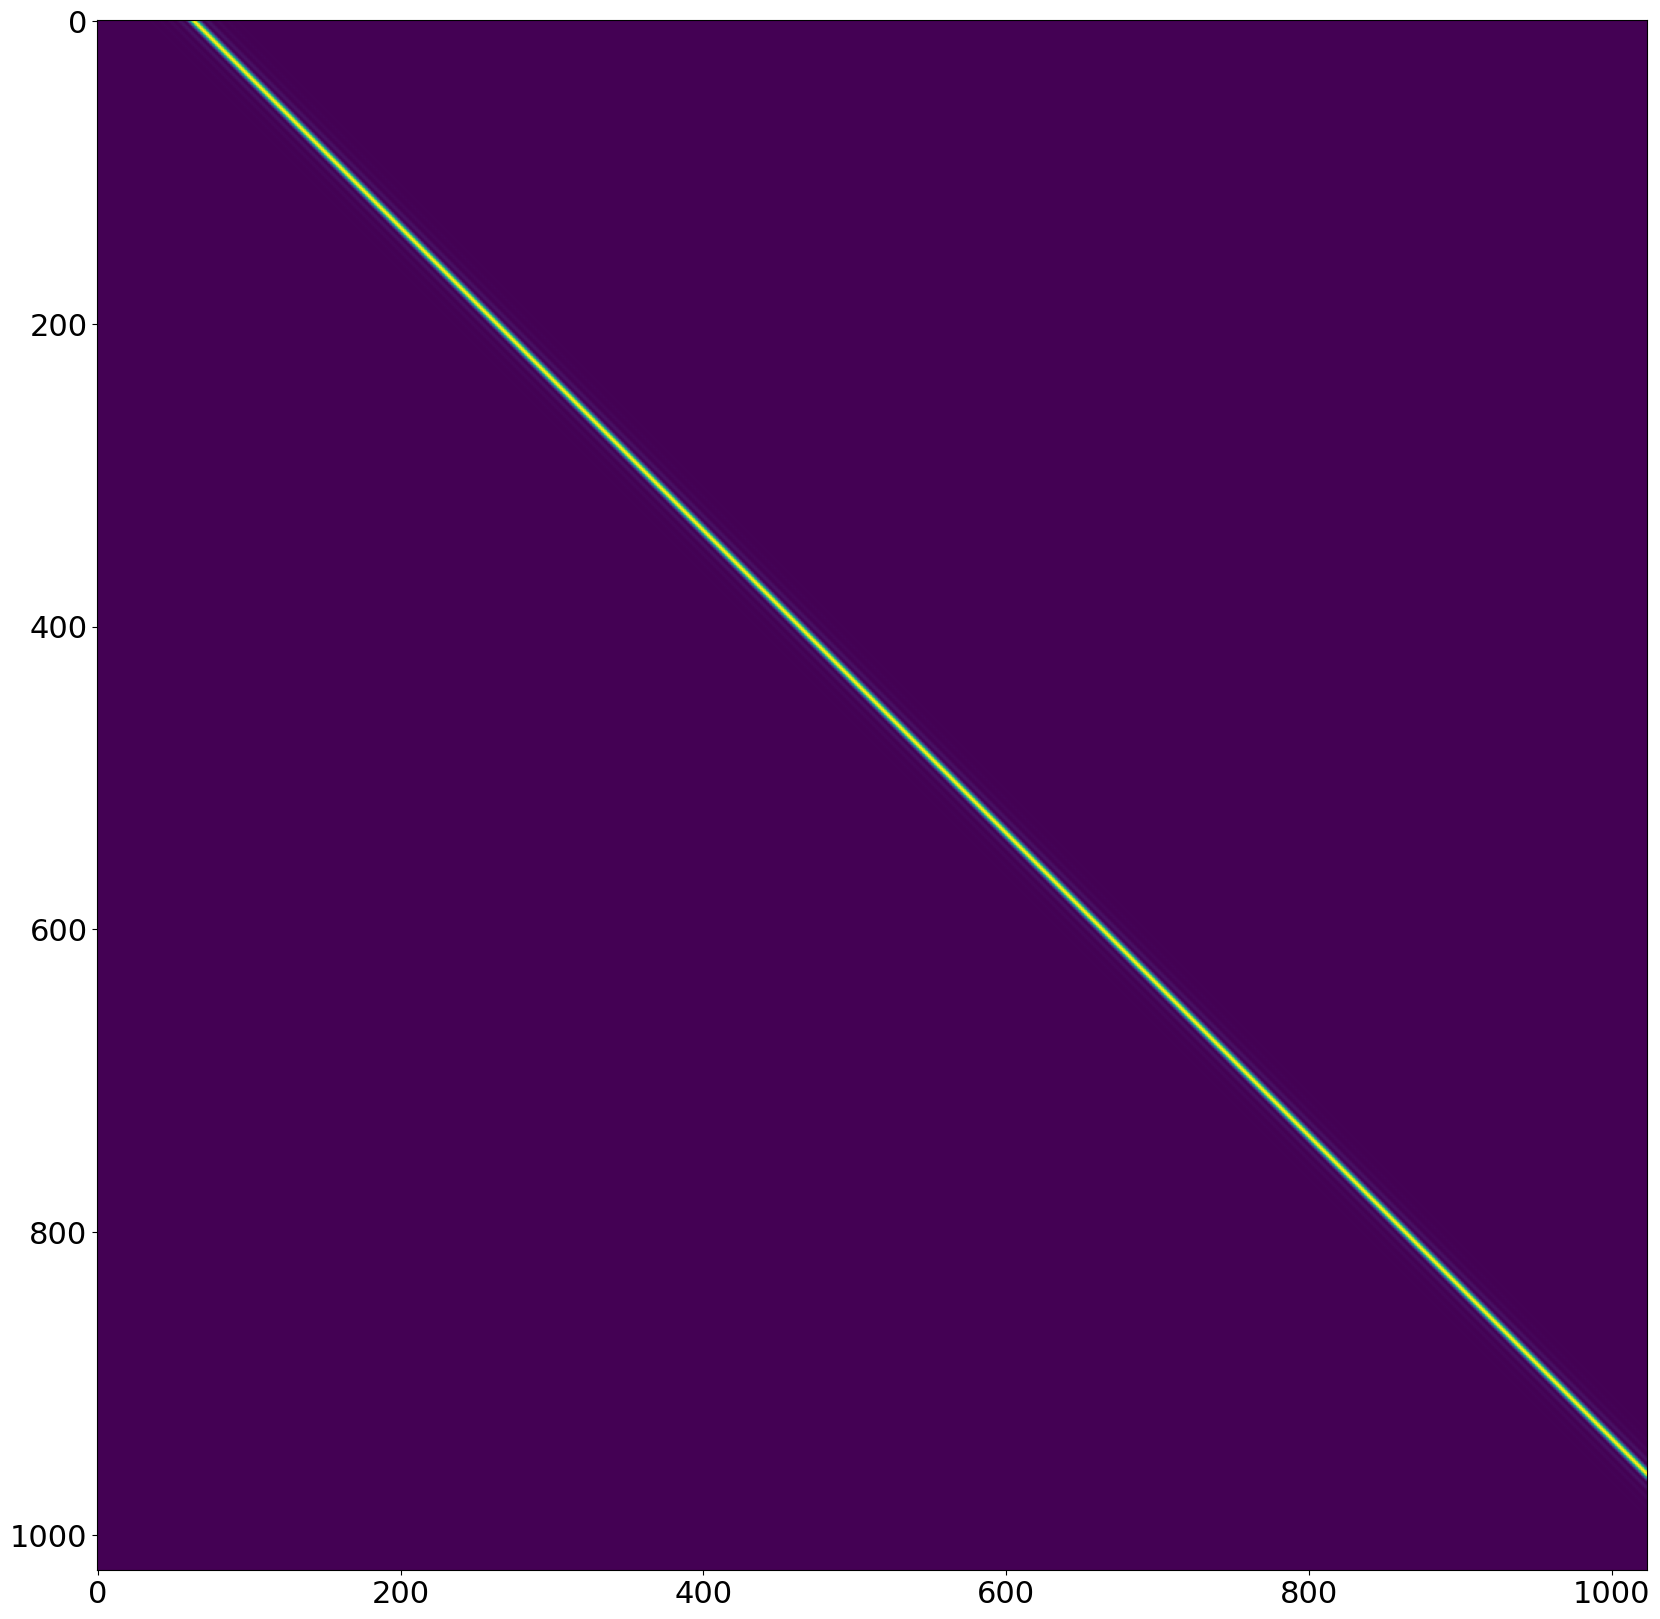

In [ ]:
#
from scipy.linalg import toeplitz
psf=np.abs(np.sinc(np.linspace(-10,10,128)))**2
N=1024
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=firstRow[0]
H=toeplitz(firstColumn,firstRow)
u, s, vh=np.linalg.svd(H)
plt.imshow(H)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

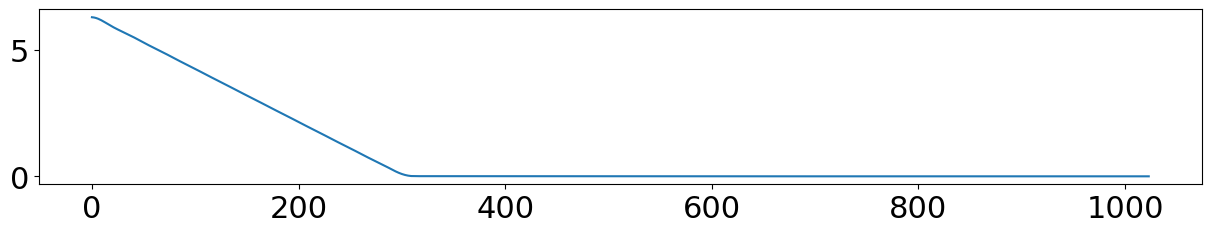

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
plt.plot(s)
plt.savefig('sinc2Spectrum.png')
files.download('sinc2Spectrum.png')

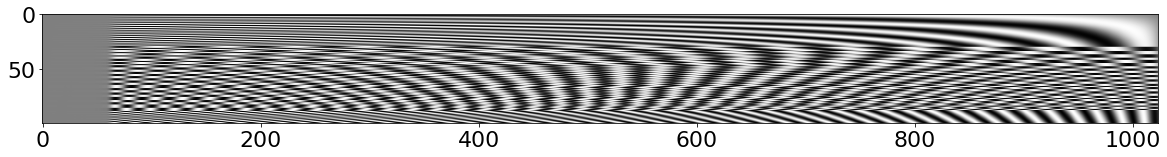

In [ ]:
plt.imshow(vh[0:100,:],cmap='gray')


## Random matrices


### Random unipolar

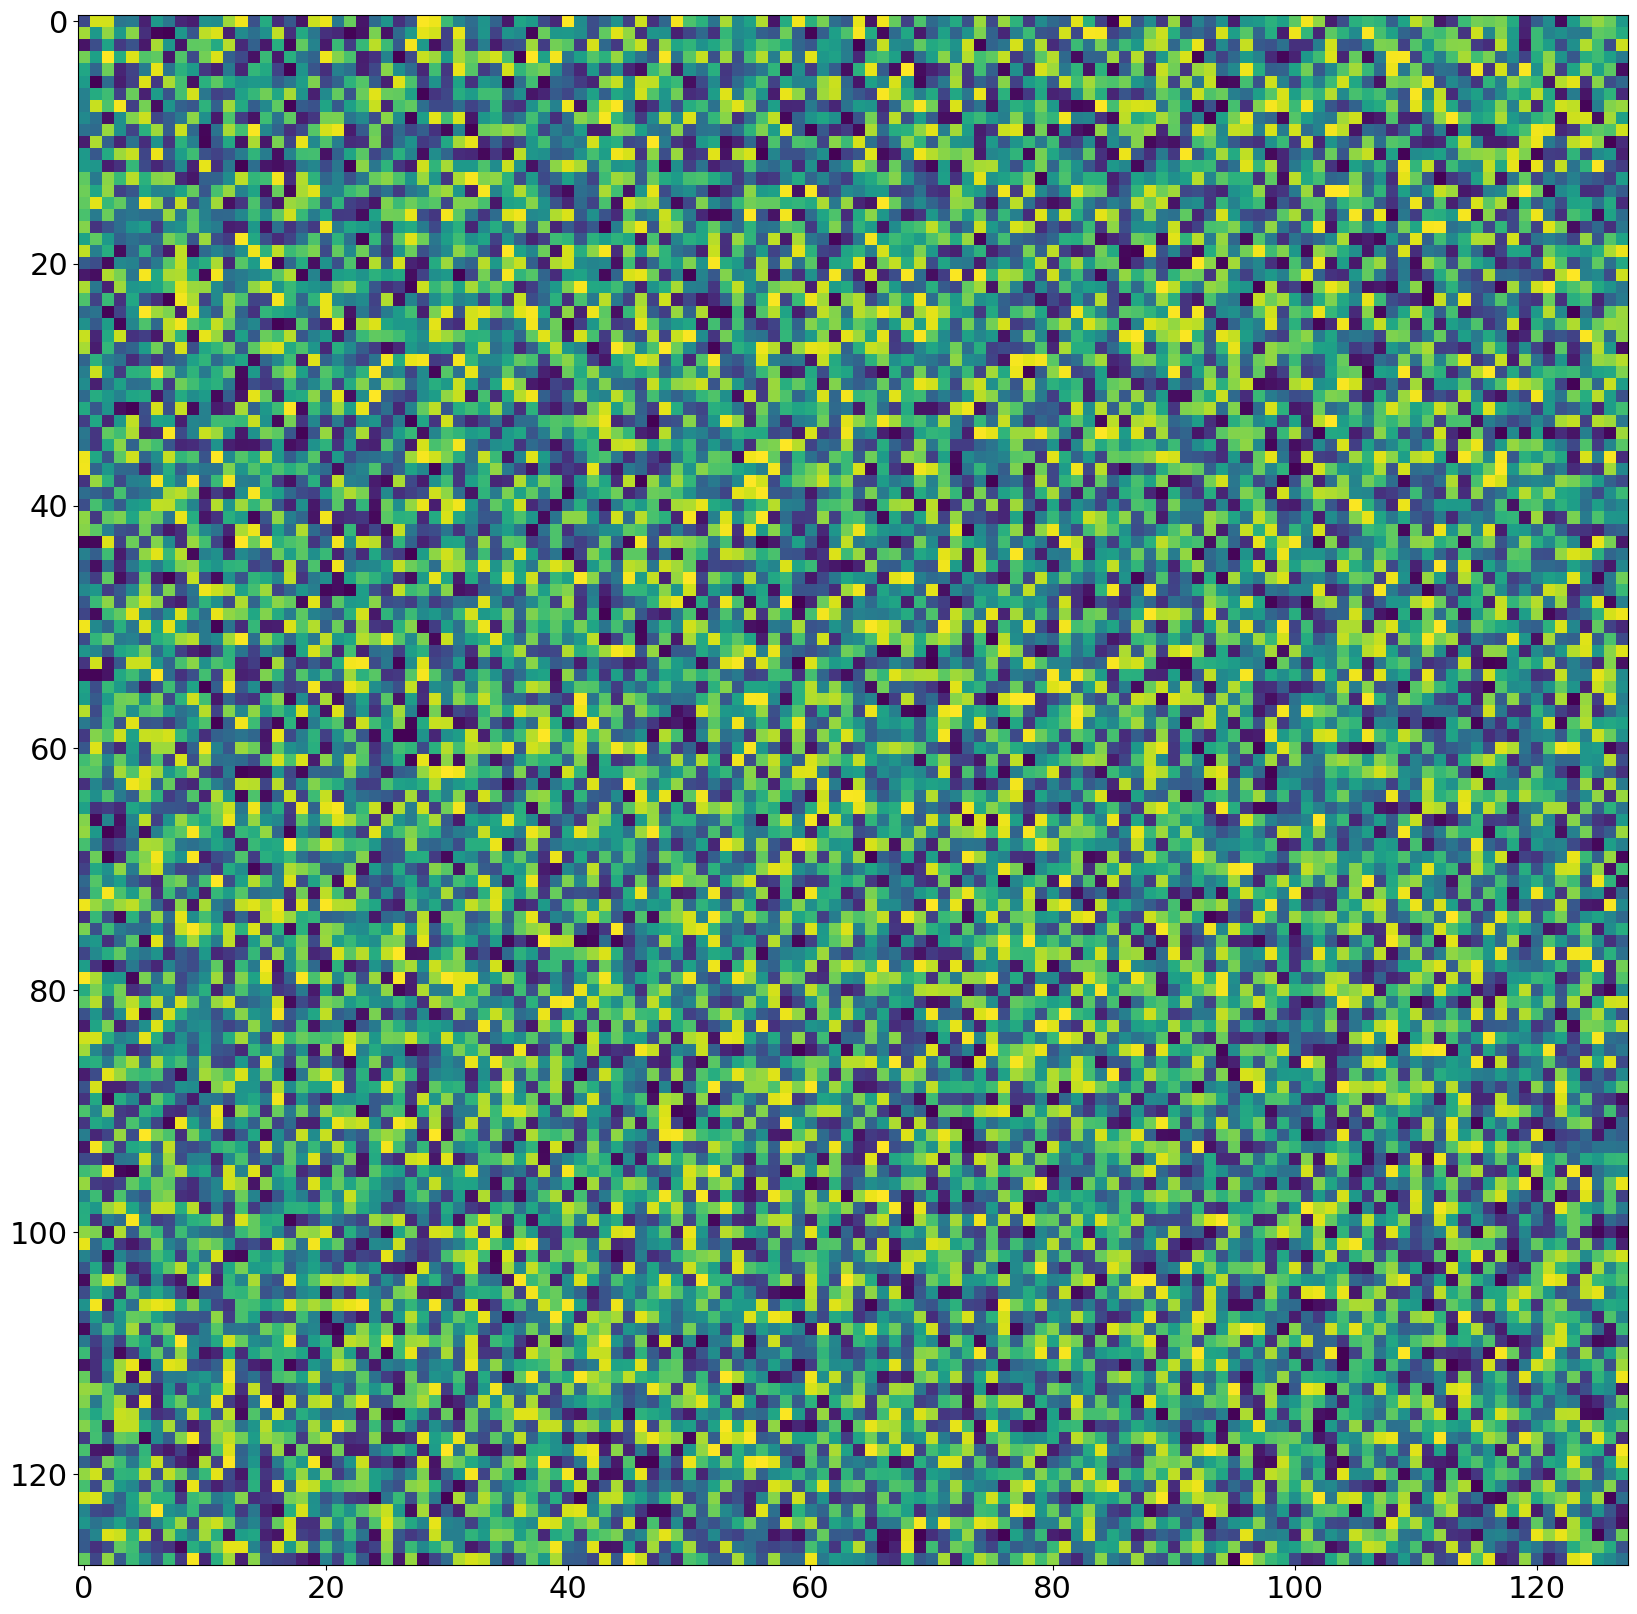

In [ ]:
#
from scipy.linalg import toeplitz
H=np.random.random((128,128))
u, s, vh=np.linalg.svd(H)
plt.imshow(H)




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

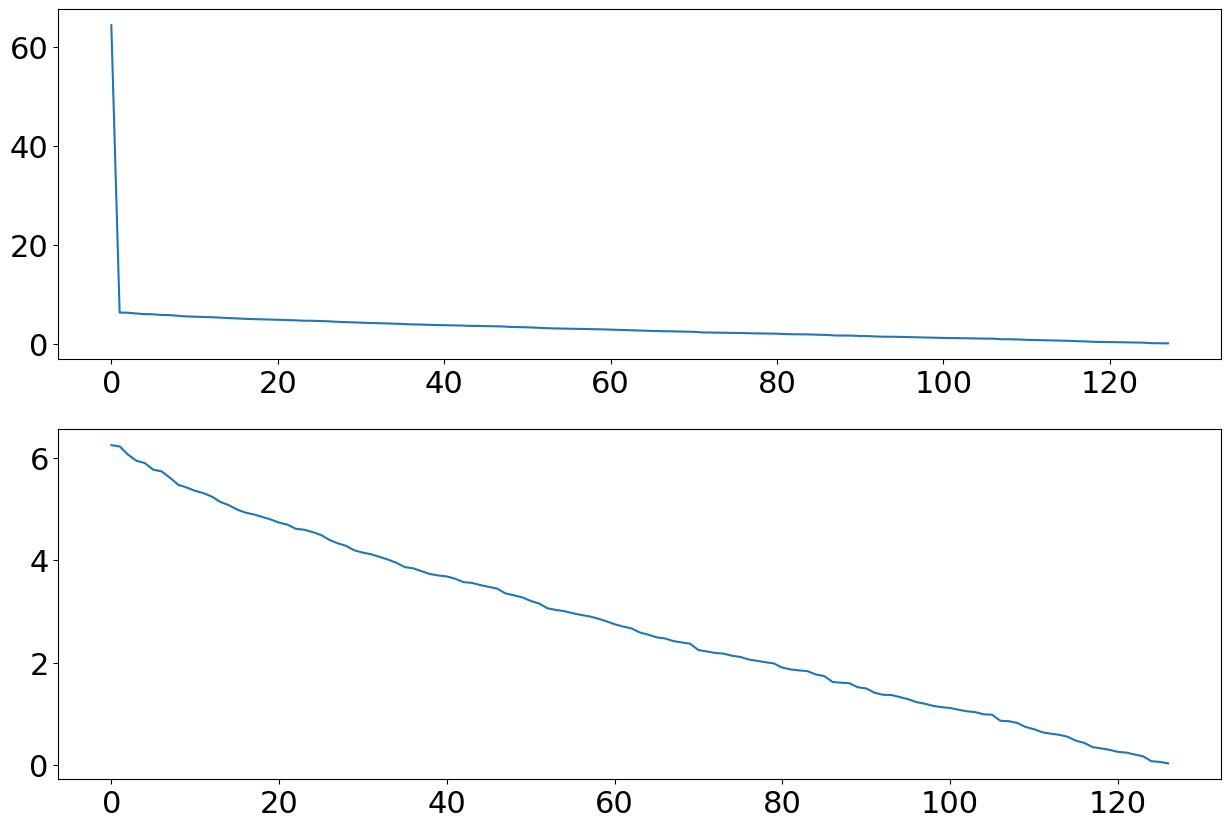

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(s)
plt.subplot(2,1,2)
plt.plot(s[1:])
plt.savefig('randomSpectrum.png')
files.download('randomSpectrum.png')

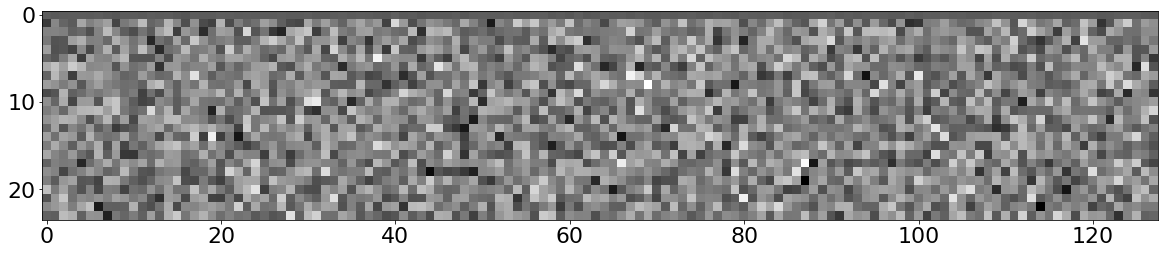

In [ ]:
plt.imshow(vh[0:24,:],cmap='gray')


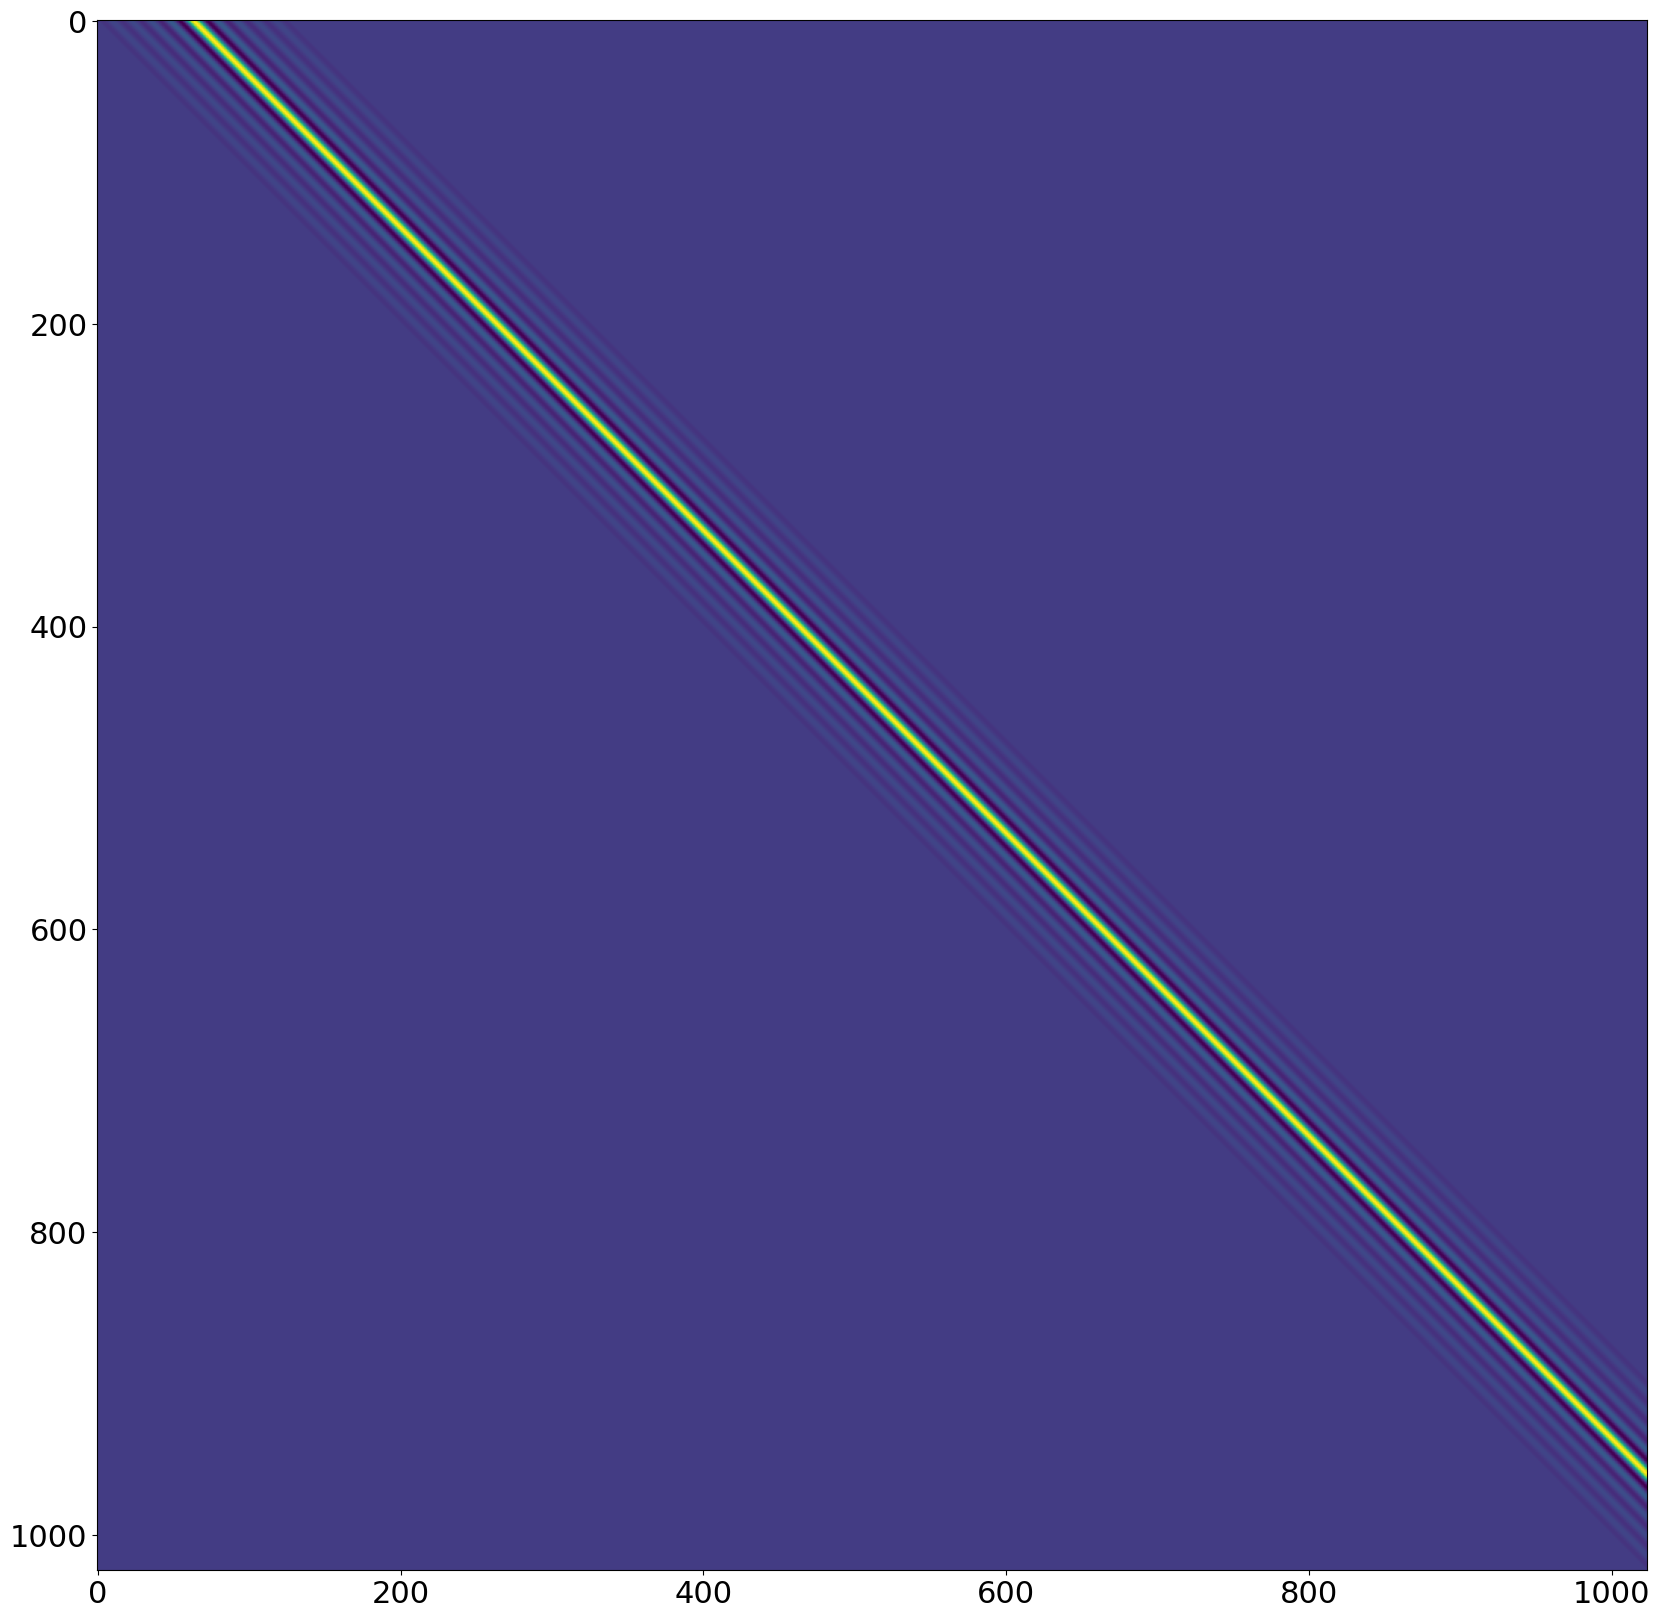

In [ ]:
#
from scipy.linalg import toeplitz
psf=np.sinc(np.linspace(-10,10,128))
N=1024
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=firstRow[0]
H=toeplitz(firstColumn,firstRow)
u, s, vh=np.linalg.svd(H)
plt.imshow(H)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

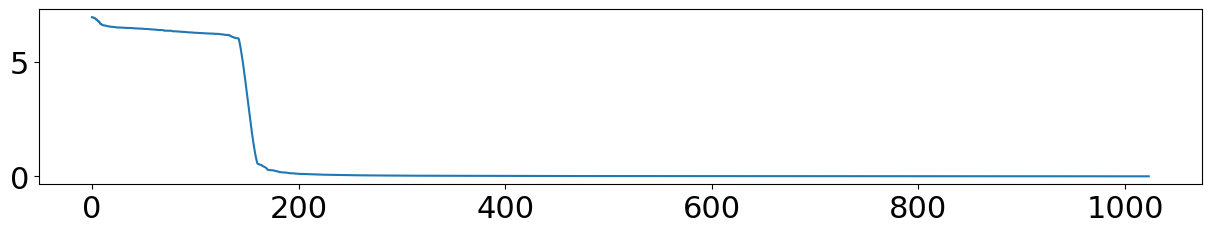

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
plt.plot(s)
plt.savefig('sincSpectrum.png')
files.download('sincSpectrum.png')

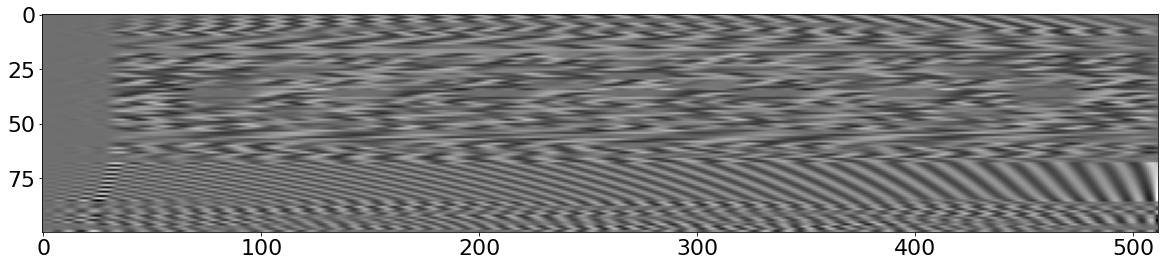

In [ ]:
plt.imshow(vh[0:100,:],cmap='gray')


### Random bipolar

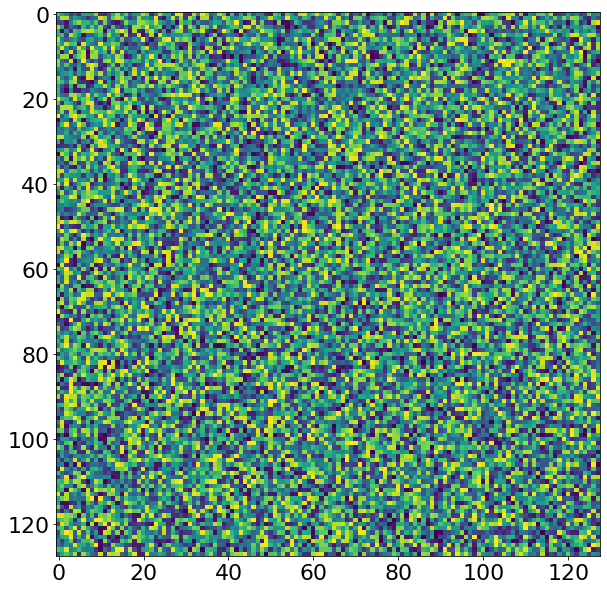

In [ ]:
#
from scipy.linalg import toeplitz
H=np.random.random((128,128))-.5
u, s, vh=np.linalg.svd(H)
plt.imshow(H)




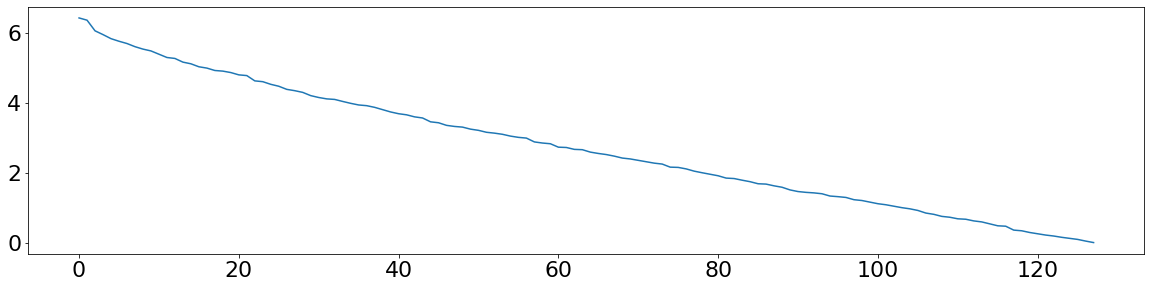

In [ ]:
plt.subplot(2,1,1)
plt.plot(s)

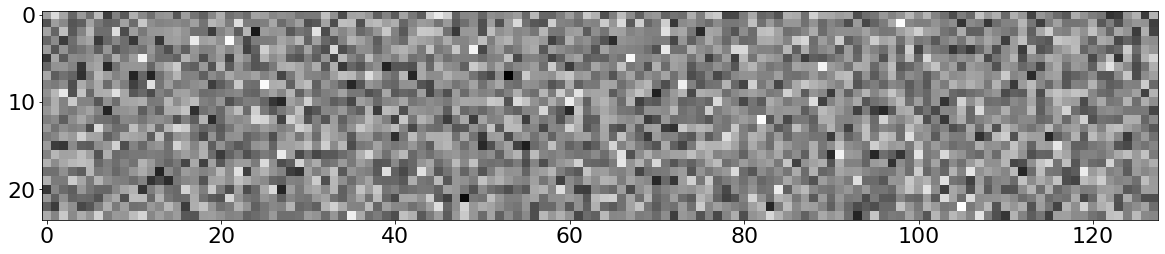

In [ ]:
plt.imshow(vh[0:24,:],cmap='gray')


## Block random bipolar

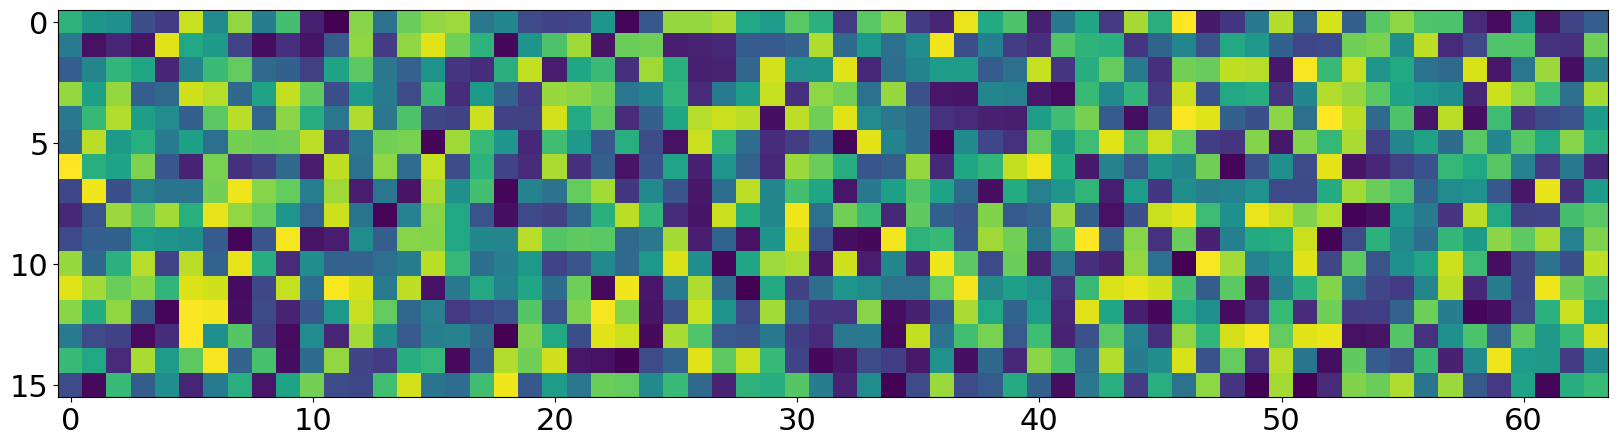

In [82]:
H=np.random.random((16,64))-.5
u, s, vh=np.linalg.svd(H)
plt.imshow(H)

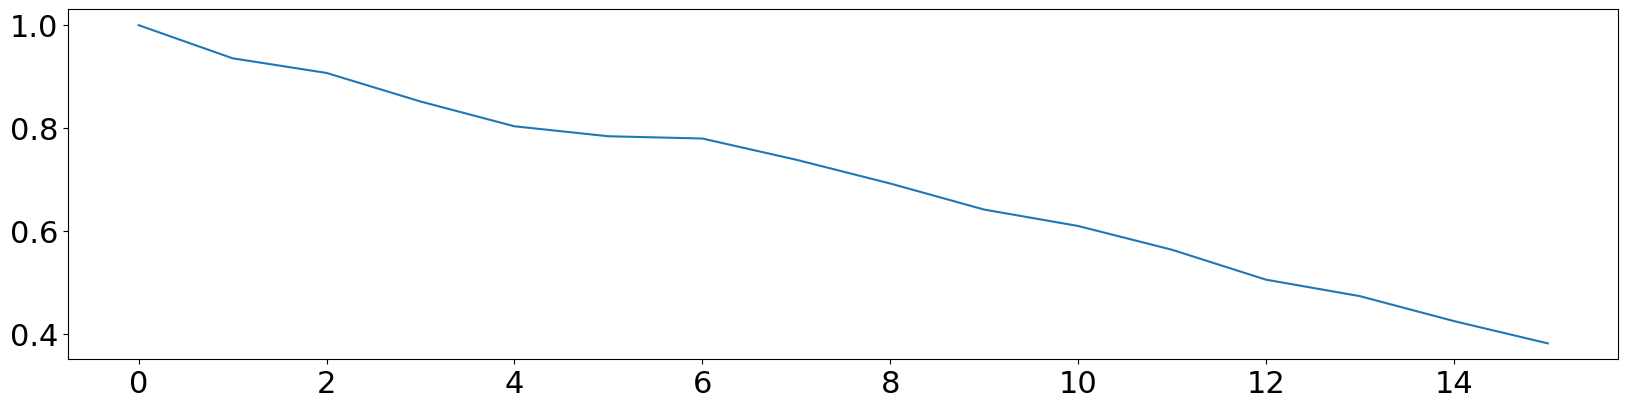

In [84]:
plt.subplot(2,1,1)
plt.plot(s/s[0])

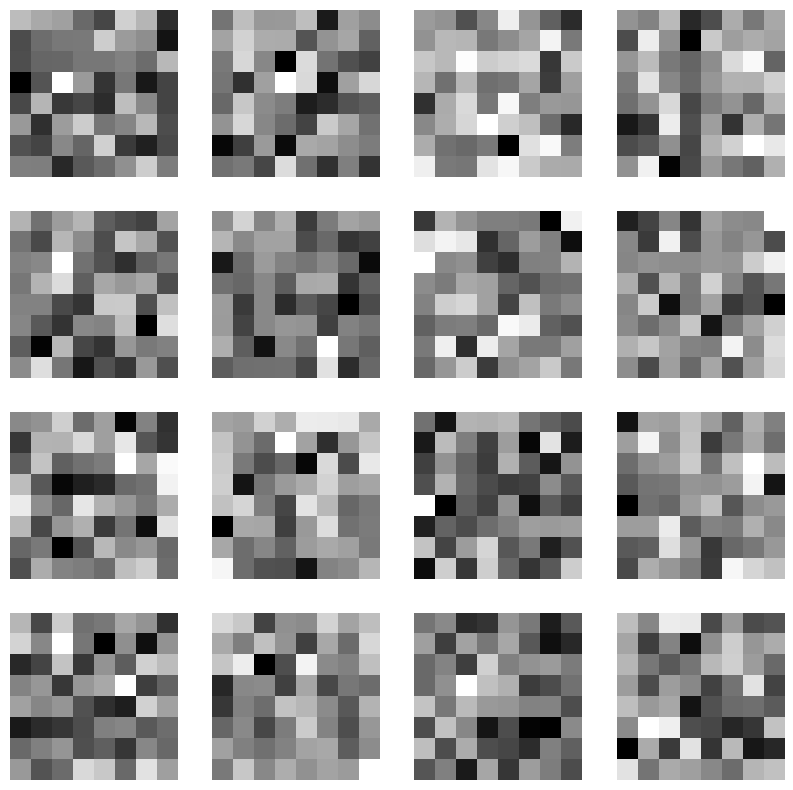

In [87]:
plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(np.reshape(vh[i,:],(8,8)),cmap='gray')
  plt.axis('off')